In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

from sklearn.preprocessing import TargetEncoder, OneHotEncoder, OrdinalEncoder, PolynomialFeatures, RobustScaler, FunctionTransformer

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor

In [3]:
# Load data
df = pd.read_csv("../data/flavors_of_cacao.csv")
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
df.describe(include="object").T

,count,unique,top,freq
Company \n(Maker-if known),1795,416,Soma,47
Specific Bean Origin\nor Bar Name,1795,1039,Madagascar,57
Cocoa\nPercent,1795,45,70%,672
Company\nLocation,1795,60,U.S.A.,764
Bean\nType,1794,41,,887
Broad Bean\nOrigin,1794,100,Venezuela,214


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
REF,1795.0,1035.904735,552.886365,5.0,576.000,1069.00,1502.0,1952.0
Review\nDate,1795.0,2012.325348,2.927210,2006.0,2010.000,2013.00,2015.0,2017.0
Rating,1795.0,3.185933,0.478062,1.0,2.875,3.25,3.5,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [7]:
df.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [10]:
# 2. Split columns:
target = 'Rating'
X = df.drop(target, axis = 1)
y = df[target]
# Convert to num and col:

convert_to_cat = ['Review\nDate', ]
convert_to_num = ["Cocoa\nPercent", ]

for col in convert_to_cat:
    X[col] = pd.Categorical(X[col])


X["Cocoa\nPercent"] = X["Cocoa\nPercent"].str.split("%", expand=True)[0]

for col in convert_to_num:
    X[col] = pd.to_numeric(X[col])

X = X.rename(columns={'Company \n(Maker-if known)':"Company",
                  'Specific Bean Origin\nor Bar Name':"Bean_Origin",
                  'Company\nLocation' : "Company_Location", 
                  'Bean\nType' : "Bean_type", 
                  'Broad Bean\nOrigin': "Broad_Bean_Origin",
                  'Cocoa\nPercent' : "Cocoa",
                  X.columns[0]: "Company_Name",
                  "Review\nDate":"Year"
                  })
X

num_cols = ["REF", "Cocoa"]
cat_cols = ['Year', 'Company_Name', 'Bean_Origin','Company_Location', 'Bean_type', 'Broad_Bean_Origin']



In [11]:
X.describe()

,REF,Cocoa
count,1795.000000,1795.000000
mean,1035.904735,71.698329
std,552.886365,6.323118
min,5.000000,42.000000
25%,576.000000,70.000000
50%,1069.000000,70.000000
75%,1502.000000,75.000000
max,1952.000000,100.000000


<Axes: xlabel='Rating', ylabel='Count'>

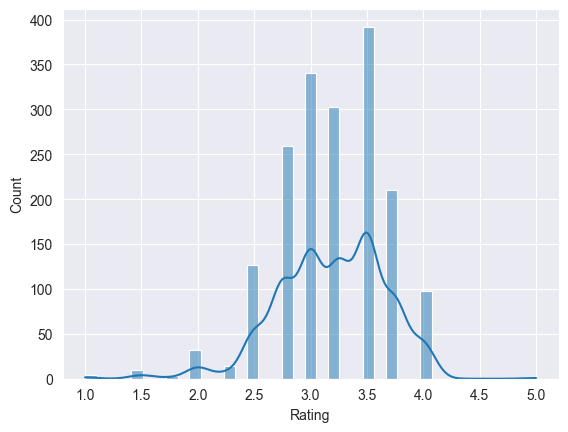

In [12]:
sns.histplot(y, kde = True)

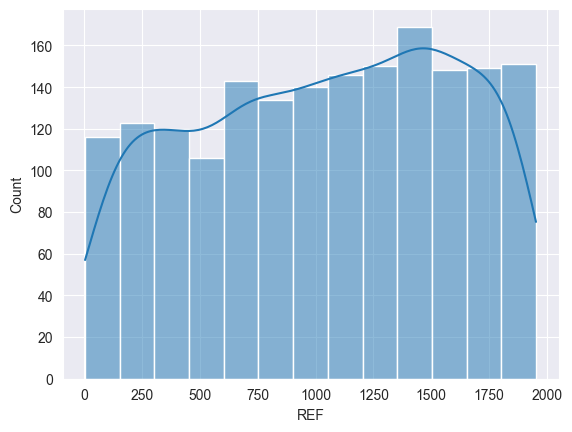

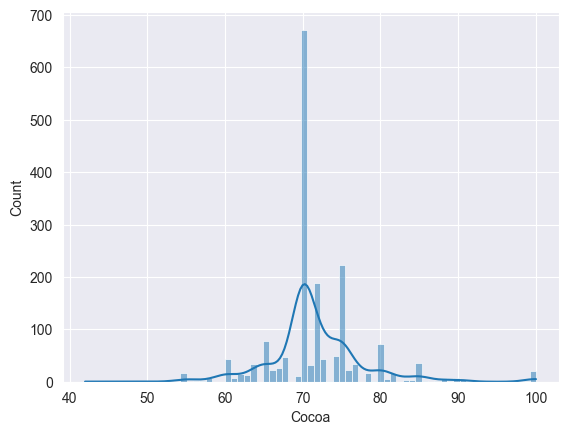

In [13]:
for col in num_cols:
    sns.histplot(X[col], kde = True)
    plt.show();

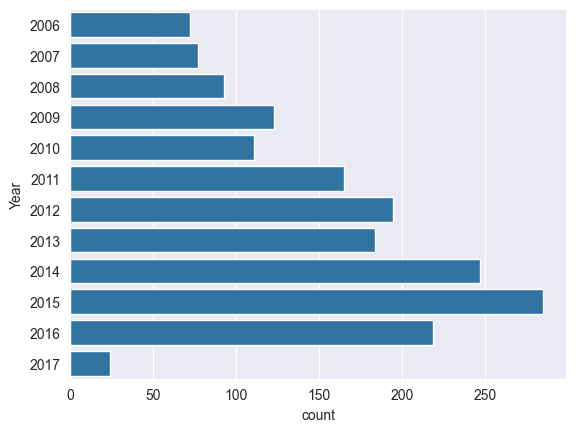

C:\Users\alien\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


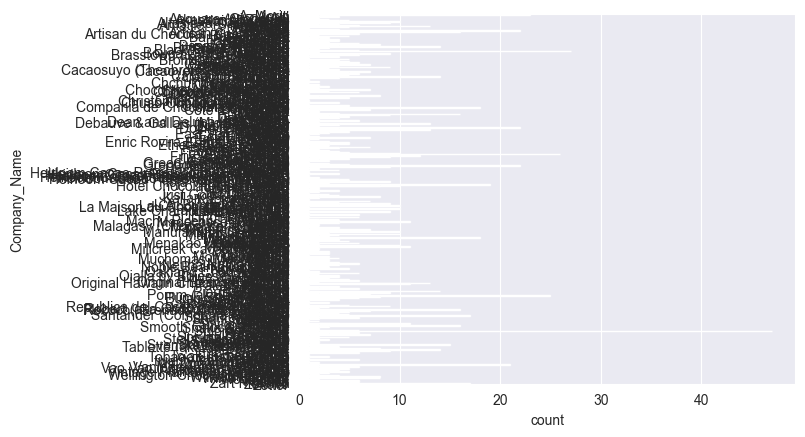

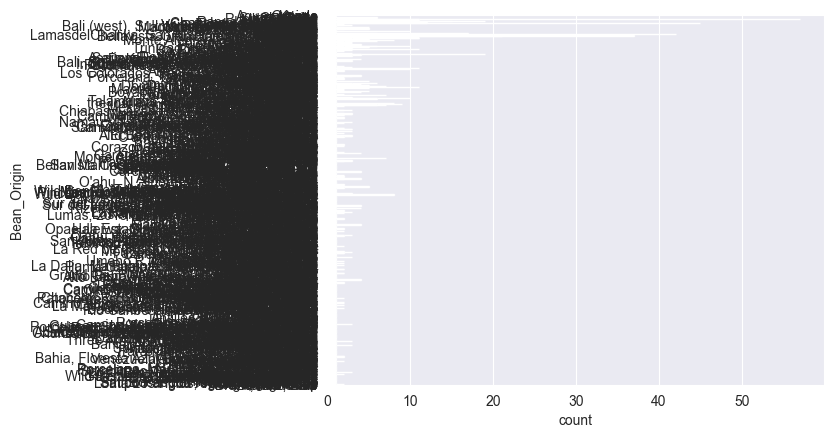

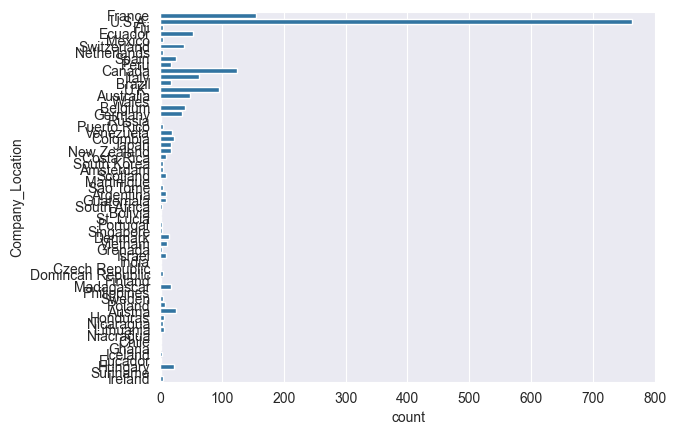

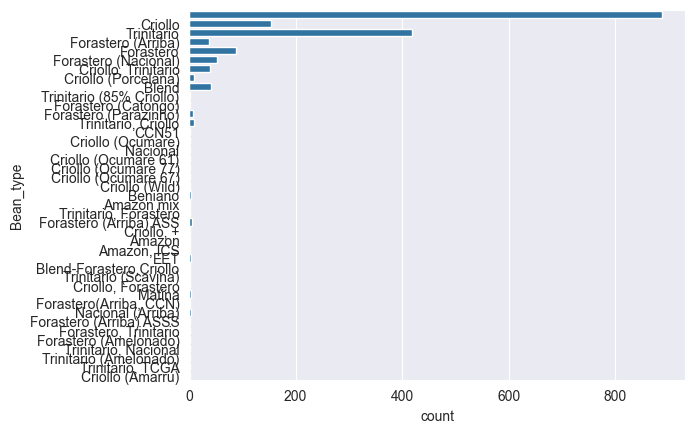

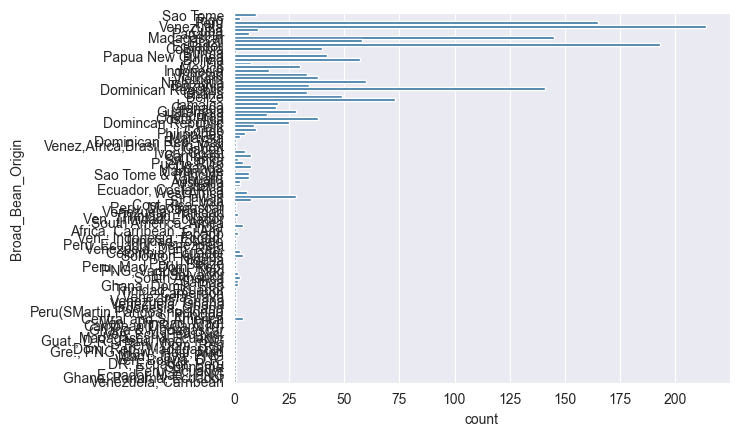

In [58]:
for col in cat_cols:
    sns.countplot(X[col])
    plt.show();

In [14]:

X.columns

Index(['Company_Name', 'Bean_Origin', 'REF', 'Year', 'Cocoa',
       'Company_Location', 'Bean_type', 'Broad_Bean_Origin'],
      dtype='object')

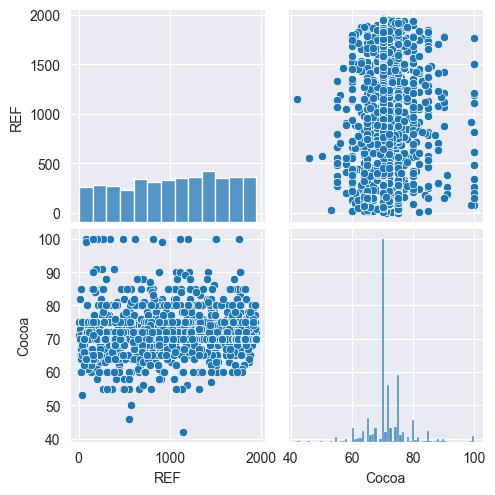

In [15]:
sns.pairplot(X[num_cols])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True, random_state=42)

In [17]:
# Pipelines to preprocess:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


def win(X, perc = 2):
    lower, upper = np.percentile(X, perc), np.percentile(X, 100-perc)
    return np.clip(X, lower, upper)

num_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("winsorization", FunctionTransformer(win)),
    ("scaler", RobustScaler())
])

cat_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="most_frequent")),
    # ('ohe', OneHotEncoder(sparse_output=False, drop = "first", handle_unknown="ignore"))
    ("targetE", TargetEncoder(smooth="auto", cv=3, ))
    ])

preprocessing = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_cols),
    ("cat",cat_pipeline, cat_cols)
])


In [ ]:
# Modelling

from sklearn.model_selection import cross_val_score
est = DecisionTreeRegressor(random_state=42)

models = {
    "dummy" : DummyRegressor(),
    "lr" : LinearRegression(),
    "hub" : HuberRegressor(),
    "rf" : RandomForestRegressor()
}
CV = 3
scoring = "neg_mean_squared_error"
for name, model in models.items():
    print("name")
    full_pipeline = Pipeline(steps=[
        ("pre", preprocessing),
        ("selection", SelectFromModel(estimator=est)),
        ("model", model)
    ], verbose=False)

    cv_scores = cross_val_score(full_pipeline, X_train, y_train, cv=CV, scoring=scoring)

    print(cv_scores, np.mean(cv_scores), np.std(cv_scores))






[-0.22857581 -0.22900977 -0.22551852] -0.2277013658516844 0.001553635900299643
[-0.19780195 -0.19978699 -0.19954201] -0.1990436515446035 0.0008836923188269019
[-0.19283856 -0.20163026 -0.19099981] -0.1951562116066687 0.004638980632314912
[-0.19672876 -0.22394936 -0.19794656] -0.20620822841503583 0.012554723306521753
